## Instalando o PyCaret

In [1]:
# !pip install pycaret
#!pip install pycaret[full]

## Verificando a versão instalada

In [2]:
import pycaret
print(pycaret.__version__)

3.3.2


## Importando bibliotecas

In [3]:
from pycaret.classification import *
import pandas as pd

## Importando o dataset para classificação

### Função: load_breast_cancer()
### Descrição do dataset: Classifica tumores como malignos (0) ou benignos (1) com base em 30 atributos numéricos.
### Tarefa: Classificação binária.

In [4]:
from sklearn.datasets import load_breast_cancer

## Preparando o DataFrame

In [5]:
# Carregar o dataset
data = load_breast_cancer()

# Criar um DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionar a coluna-alvo (target)
df['target'] = data.target

# Visualizar as 5 primeiras linhas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Informações básicas

In [6]:
df.info()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,count
target,
1,357
0,212


## Verificando a identificação de cada classe

In [7]:
print(data.target_names)

['malignant' 'benign']


## Configurando o ambiente do PyCaret

In [8]:
 # Inicializa o ambiente de configuração do PyCaret para classificação
clf = setup(
    # DataFrame com os dados que serão utilizados (variáveis + alvo)
    data = df,
    # Nome da coluna que contém a variável alvo (classe a ser prevista)
    target = 'target',
    # Habilita a normalização dos dados numéricos (ajusta escalas)
    normalize = True,
    # Define o método de normalização (padroniza com média 0 e desvio padrão 1)
    # Preserva melhor a dispersão e reduz o impacto dos outliers.
    # Centraliza e escala todas as variáveis sem restringir a amplitude.
    normalize_method = 'zscore',
    # Define uma semente aleatória para garantir reprodutibilidade dos resultados
    session_id = 42
)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(398, 31)"
6,Transformed test set shape,"(171, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


## Etapas do pré-processamento realizadas de forma automática, porém personalizáveis


*   Remoção de publicatas
*   Imputação de valores ausentes
*   Codificação de variáveis (one-hot/ordinal)
*   Remoção de colunas constantes
*   Divisão treino-teste (70/30)

In [9]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mean radius', 'mean texture',
                                             'mean perimeter', 'mean area',
                                             'mean smoothness',
                                             'mean compactness',
                                             'mean concavity',
                                             'mean concave points',
                                             'mean symmetry',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'perimeter error', 'area error',
                                             'smoothness...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

## Comparar os modelos

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9799,0.9917,0.9920,0.9769,0.9842,0.9566,0.9575,1.2050
rf,Random Forest Classifier,0.9725,0.9859,0.9800,0.9767,0.9781,0.9411,0.9419,0.1760
et,Extra Trees Classifier,0.9700,0.9925,0.9760,0.9764,0.9759,0.9361,0.9372,0.1250
catboost,CatBoost Classifier,0.9700,0.9901,0.9760,0.9761,0.9759,0.9361,0.9366,6.7750
knn,K Neighbors Classifier,0.9699,0.9841,0.9880,0.9652,0.9763,0.9349,0.9360,0.0510
lightgbm,Light Gradient Boosting Machine,0.9624,0.9888,0.9800,0.9615,0.9703,0.9190,0.9208,0.3150
svm,SVM - Linear Kernel,0.9623,0.9845,0.9760,0.9654,0.9703,0.9186,0.9198,0.0270
ridge,Ridge Classifier,0.9623,0.9906,0.9920,0.9510,0.9707,0.9178,0.9207,0.0300
ada,Ada Boost Classifier,0.9599,0.9832,0.9720,0.9650,0.9680,0.9144,0.9162,0.1150
gbc,Gradient Boosting Classifier,0.9575,0.9875,0.9680,0.9646,0.9657,0.9098,0.9117,0.2670


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Métricas de compração no PyCaret

*   **Accuracy** → indica a proporção de previsões corretas entre todas as amostras.
*   **AUC** (Area Under the Curve) → mede a capacidade do modelo de distinguir entre as classes (quanto maior, melhor).
*   **Recall** (Sensibilidade) → mostra quantos casos positivos reais o modelo conseguiu identificar corretamente.
*   **Precision** → mostra quantos dos casos classificados como positivos realmente eram positivos.
*   **F1-Score** → é a média harmônica entre precisão e recall, equilibrando as duas métricas.
*   **Kappa** (Cohen’s Kappa) → avalia o quanto o modelo supera o acaso nas previsões corretas.
*   **MCC** (Matthews Correlation Coefficient) → mede a correlação entre previsões e valores reais, considerando acertos e erros em todas as classes.
*   **Log Loss** → penaliza previsões incorretas baseadas na probabilidade atribuída; quanto menor, melhor.

## Otimização automática dos hiperparâmetros

Ajusta o modelo "best_model" (obtido anteriormente via compare_models()) para melhorar seu desempenho.

O PyCaret utiliza técnicas de busca como Random Search, Grid Search ou Bayesian Optimization, variando parâmetros internos do algoritmo (ex: profundidade de árvore, taxa de aprendizado, número de estimadores, etc.).

O objetivo é encontrar a combinação de hiperparâmetros que maximize uma métrica de avaliação (por padrão, 'Accuracy' em classificação).

O resultado é um novo modelo, armazenado em "tuned_model", que normalmente apresenta desempenho superior ao modelo original.

In [11]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,0.9867,1.0000,0.9615,0.9804,0.9459,0.9473
2,0.9750,0.9867,1.0000,0.9615,0.9804,0.9459,0.9473
3,0.9250,0.9947,0.9200,0.9583,0.9388,0.8421,0.8433
4,0.9500,0.9600,0.9600,0.9600,0.9600,0.8933,0.8933
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Cria e treina um modelo usando os dados já preparados no setup()

O PyCaret escolhe automaticamente os hiperparâmetros padrões e executa uma validação cruzada (cross-validation) para avaliar o desempenho médio do modelo.

Retorna o modelo treinado e suas métricas (Accuracy, Recall, F1, etc.), armazenando o objeto na variável et_model.

In [12]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,0.9893,1.0000,0.9615,0.9804,0.9459,0.9473
2,0.9750,0.9867,1.0000,0.9615,0.9804,0.9459,0.9473
3,0.9250,0.9893,0.9600,0.9231,0.9412,0.8378,0.8391
4,0.9750,0.9547,1.0000,0.9615,0.9804,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9750,0.9973,0.9600,1.0000,0.9796,0.9474,0.9487
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Matriz de confusão

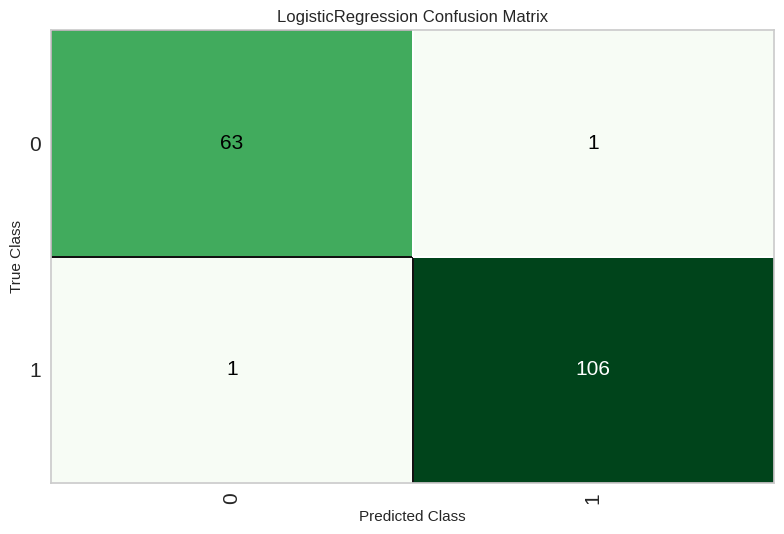

In [13]:
plot_model(best_model, plot='confusion_matrix')

## Avaliação grafica do desempenho do modelo treinado

Essa função abre uma interface interativa de avaliação (painel gráfico) para o modelo que você passou como argumento — no caso, best_model.

Ela é usada após o treinamento e permite visualizar e analisar o desempenho do modelo por meio de gráficos e métricas automáticas.

In [24]:
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.8800,0.9600,0.8889,0.9231,0.7808,0.7856
1,0.8750,0.8867,0.8400,0.9545,0.8936,0.7436,0.7525
2,0.9750,0.9667,1.0000,0.9615,0.9804,0.9459,0.9473
3,0.9250,0.9133,0.9600,0.9231,0.9412,0.8378,0.8391
4,0.8750,0.8600,0.9200,0.8846,0.9020,0.7297,0.7308
5,0.8250,0.8200,0.8400,0.8750,0.8571,0.6316,0.6325
6,0.9250,0.9267,0.9200,0.9583,0.9388,0.8421,0.8433
7,0.9500,0.9333,1.0000,0.9259,0.9615,0.8904,0.8958
8,0.9487,0.9443,0.9600,0.9600,0.9600,0.8886,0.8886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpretação visual do modelo

Gera uma interpretação visual do modelo — mostrando quais variáveis mais influenciam nas previsões.

Por padrão, o PyCaret utiliza a biblioteca SHAP (SHapley Additive exPlanations) para calcular a importância das features.

Mostra o impacto de cada atributo nas previsões (positiva ou negativa).

Classifica as features por importância.

Ajuda a entender como o modelo toma decisões, o que é essencial para interpretabilidade e transparência.

In [15]:
rf_model2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9250,0.9613,0.9200,0.9583,0.9388,0.8421,0.8433
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9750,0.9493,1.0000,0.9615,0.9804,0.9459,0.9473
4,0.9250,0.9640,0.9200,0.9583,0.9388,0.8421,0.8433
5,0.9000,0.9840,0.9600,0.8889,0.9231,0.7808,0.7856
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

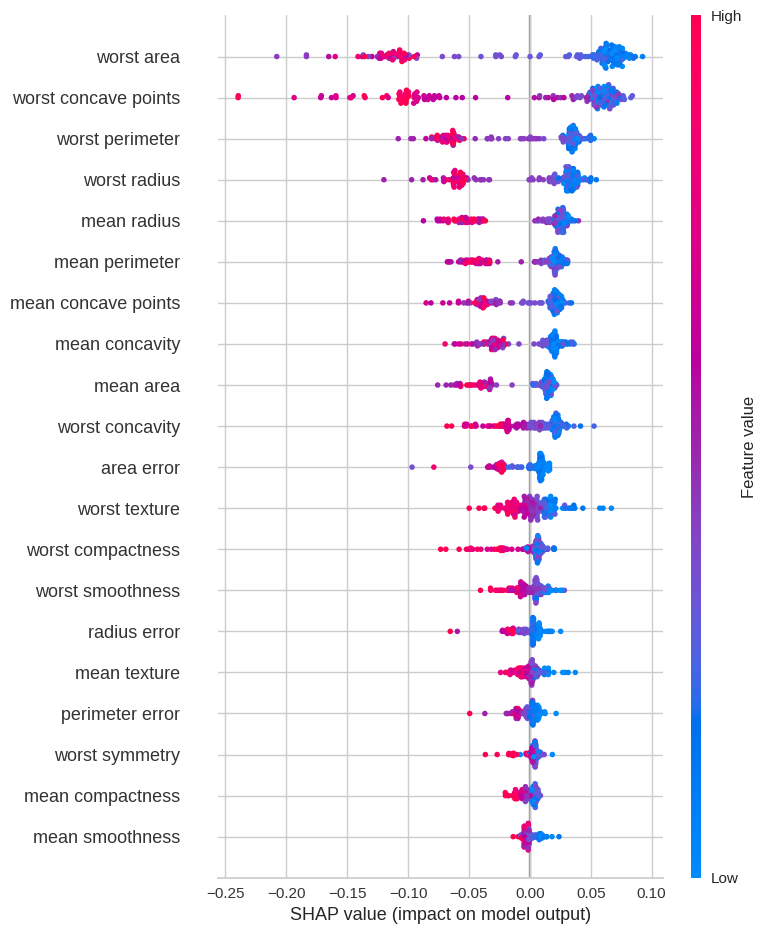

In [16]:
interpret_model(rf_model2)

## Fazendo predições com os dados de teste

In [17]:
predicoes = predict_model(best_model)
predicoes.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9883,0.9981,0.9907,0.9907,0.9907,0.9750,0.9750


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,prediction_label,prediction_score
14,13.73,22.610001,93.599998,578.299988,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,697.700012,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310,0,0,0.9679
150,13.00,20.780001,83.510002,519.400024,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,616.700012,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435,1,1,0.9501
275,11.89,17.360001,76.199997,435.600006,0.12250,0.07210,0.05929,0.07404,0.2015,0.05875,...,472.399994,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033,1,1,0.9835
83,19.10,26.290001,129.100006,1132.000000,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,1298.000000,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203,0,0,0.9989
86,14.48,21.459999,94.250000,648.200012,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,808.900024,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846,0,0,0.7147


## Finalizando o modelo para o ambiente de produção

In [18]:
final_model = finalize_model(best_model)

## Salvar o modelo em um arquivo

É uma função do PyCaret usada para persistir (armazenar) um modelo já treinado, junto com todo o pipeline de pré-processamento criado pelo setup().

O PyCaret adiciona automaticamente a extensão .pkl (arquivo pickle, formato binário usado pelo Python).

In [19]:
save_model(final_model, 'modelo_pycaret_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['mean radius', 'mean texture',
                                              'mean perimeter', 'mean area',
                                              'mean smoothness',
                                              'mean compactness',
                                              'mean concavity',
                                              'mean concave points',
                                              'mean symmetry',
                                              'mean fractal dimension',
                                              'radius error', 'texture error',
                                              'perimeter error', 'area error',
                                              'smoothness error',
                                              'com...
                  TransformerWrapper(ex

## Carregando o modelo treinado

A função load_model() lê o arquivo modelo_pycaret_final.pkl (que foi salvo com save_model()) e reconstrói o modelo completo, exatamente como estava no momento em que foi salvo, ou seja, pronto para ser usado em novas previsões sem precisar reconfigurar ou retreinar.

In [20]:
modelo_carregado = load_model('modelo_pycaret_final')

Transformation Pipeline and Model Successfully Loaded


## Testando uma nova entrada

In [21]:
# Cria uma nova entrada (simulando um novo paciente, por exemplo)
nova_entrada = pd.DataFrame({
    'mean radius': [14.5],
    'mean texture': [20.0],
    'mean perimeter': [96.0],
    'mean area': [600.0],
    'mean smoothness': [0.09],
    'mean compactness': [0.10],
    'mean concavity': [0.07],
    'mean concave points': [0.04],
    'mean symmetry': [0.18],
    'mean fractal dimension': [0.06],
    'radius error': [0.35],
    'texture error': [1.5],
    'perimeter error': [2.2],
    'area error': [20.0],
    'smoothness error': [0.006],
    'compactness error': [0.015],
    'concavity error': [0.02],
    'concave points error': [0.01],
    'symmetry error': [0.02],
    'fractal dimension error': [0.003],
    'worst radius': [16.0],
    'worst texture': [25.0],
    'worst perimeter': [110.0],
    'worst area': [800.0],
    'worst smoothness': [0.12],
    'worst compactness': [0.18],
    'worst concavity': [0.14],
    'worst concave points': [0.08],
    'worst symmetry': [0.28],
    'worst fractal dimension': [0.08]
})

## Predição para a nova entrada

0 = maligno
1 = benigno

In [22]:
# Faz a predição com a nova entrada
resultado = predict_model(modelo_carregado, data=nova_entrada)
resultado

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prediction_label,prediction_score
0,14.5,20.0,96.0,600.0,0.09,0.1,0.07,0.04,0.18,0.06,...,110.0,800.0,0.12,0.18,0.14,0.08,0.28,0.08,1,0.9483
